In [1]:
# import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import thinkstats2
import thinkplot

import pandas as pd

In [2]:
hiking = pd.read_csv('gpx-tracks-from-hikr.org.csv')
hike = pd.DataFrame(hiking)


In [3]:
# convert from metric system to US equivalents

conversion_rate_miles = 0.00062137119 # meters to miles conversion rate
conversion_rate_feet = 3.28084  # meters to feet conversion rate
conversion_rate_hours = 60 * 60  # seconds to hours conversion rate
hike['moving_time_hours'] = hike['moving_time'] / conversion_rate_hours  # convert moving time in seconds to hours
hike['length_miles'] = hike['length_3d'] * conversion_rate_miles  # convert length in meters to miles
hike['max_elevation_feet'] = hike['max_elevation'] * conversion_rate_feet  # convert max elevation in meters to feet
hike['max_speed_mph'] = hike['max_speed'] * conversion_rate_miles * conversion_rate_hours  # convert max speed in meters per second to miles per hour

check = conversion_rate_miles * conversion_rate_hours  # conversion from meters per sec to mph s/b approximately 2.2369
check


2.236936284

In [4]:
# add additional variables

hike['difficulty_num'] = hike['difficulty'].map(lambda x: int(x[1])).astype('int32')


In [5]:
hike.describe()

,length_3d,max_elevation,uphill,moving_time,max_speed,min_elevation,downhill,length_2d,moving_time_hours,length_miles,max_elevation_feet,max_speed_mph,difficulty_num
count,1.214100e+04,10563.000000,12141.000000,12141.000000,12141.000000,10563.000000,12141.000000,1.214100e+04,12141.000000,12141.000000,10563.000000,12141.000000,12141.000000
mean,1.874771e+04,1934.281708,942.184362,12848.445268,1.746356,1003.331150,879.145539,1.874771e+04,3.569013,11.649287,6346.068797,3.906487,2.867886
std,4.093098e+05,784.968353,1065.498993,11599.792248,5.394065,813.001041,1028.618856,4.093098e+05,3.222165,254.333337,2575.355571,12.066179,1.162571
min,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,-32768.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.280840,0.000000,1.000000
25%,8.254129e+03,1382.275000,420.142000,5260.000000,1.078841,560.020000,256.519000,8.254129e+03,1.461111,5.128878,4535.023111,2.413299,2.000000
50%,1.200577e+04,1986.700000,882.000000,12990.000000,1.367020,960.090000,823.199002,1.200577e+04,3.608333,7.460037,6518.044828,3.057937,3.000000
75%,1.645813e+04,2498.455848,1301.005000,18514.000000,1.604181,1389.485000,1266.923000,1.645813e+04,5.142778,10.226610,8197.033885,3.588450,3.000000
max,3.189180e+07,5633.462891,35398.006781,189380.000000,192.768748,4180.000000,52379.200000,3.189180e+07,52.605556,19816.648544,18482.490390,431.211408,6.000000


o A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

moving_time_hours
length_miles
max_elevation_feet
uphill
max_speed_mph
difficulty_num

o Describe what the 5 variables mean in the dataset (Chapter 1).

moving_time_hours - total time spent hiking in hours
length_miles - total length of hike in miles
max_elevation_feet - highest elevation of hike in feet
uphill - elevation gain (in feet)
maximum_speed_mph - fastert hiking speed in miles per hour
difficulty_num - difficulty of hike on a scale of 1-5 (5 being the hardest) as determined by hiker

o Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

Text(0.5, 1.0, 'Histogram of Moving Time')

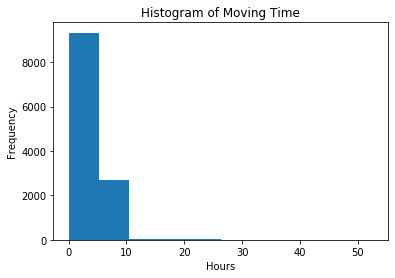

In [6]:
hike.moving_time_hours.plot(kind = 'hist', bins = 10)

plt.xlabel("Hours")
plt.title("Histogram of Moving Time")


Text(0.5, 1.0, 'Histogram of Hike Length')

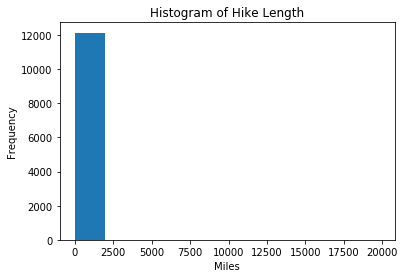

In [7]:
hike.length_miles.plot(kind = 'hist', bins = 10)

plt.xlabel("Miles")
plt.title("Histogram of Hike Length")


Text(0.5, 1.0, 'Histogram of Max Elevation')

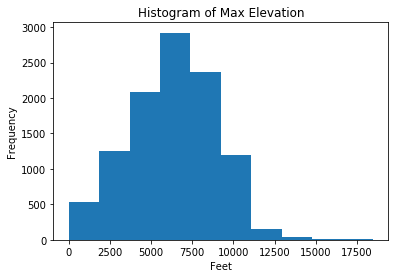

In [8]:
hike.max_elevation_feet.plot(kind = 'hist', bins = 10)

plt.xlabel("Feet")
plt.title("Histogram of Max Elevation")

Text(0.5, 1.0, 'Histogram of Elevation Gain')

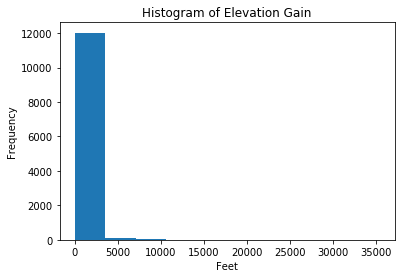

In [9]:
hike.uphill.plot(kind = 'hist', bins = 10)

plt.xlabel("Feet")
plt.title("Histogram of Elevation Gain")


Text(0.5, 1.0, 'Histogram of Max Speed')

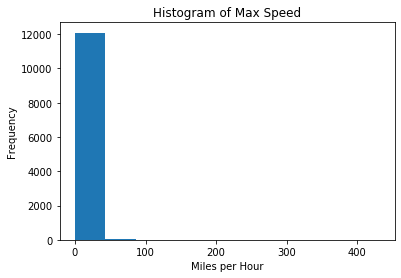

In [10]:
hike.max_speed_mph.plot(kind = 'hist', bins = 10)

plt.xlabel("Miles per Hour")
plt.title("Histogram of Max Speed")


Text(0.5, 1.0, 'Histogram of Hike Difficulty')

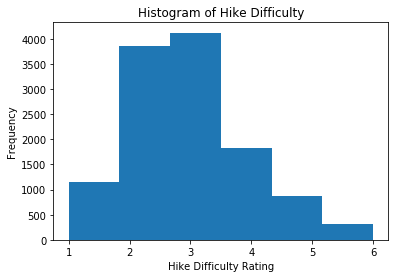

In [11]:
hike.difficulty_num.plot(kind = "hist", bins = 6)

plt.xlabel("Hike Difficulty Rating")
plt.title("Histogram of Hike Difficulty")


Outliers are significantly impacting the histograms as shown above.  Will remove zero and nan values and make some assumptions regarding maximum values and then rerun the histograms.

For this analysis, I am assuming these are day hikes as opposed to overnight backpacking trips and making the following maximum assumptions about the variables to eliminate likely outliers:

The time spent hiking is highly unlikely to exceed 20 hours in one day.
The length of the hike in miles is highly unlikely to exceed 30 miles in one day.
The maximum elevation is highly unlikely to exceed 20,000 feet
The uphill (elevation gain) is highly unlikely to exceed 10,000 feet in one day.
The maximum hiking speed is highly unlikely to exceed 10 miles per hour.
Hiking difficulty should be in the range 1-5 (6 is not a valid option)


In [12]:
# create new dataframe with clean values and only columns I need
clean = hike.replace(0, np.nan)  # convert zero values to nan
clean = clean.dropna()  # drop NA values

clean = clean[(clean.moving_time_hours <= 20) & (clean.length_miles <= 30) & (clean.max_elevation_feet <= 20000) & 
            (clean.uphill <= 10000) & (clean.max_speed_mph <= 10) & (clean.difficulty_num <= 5)]  # drop outliers
new = clean[["moving_time_hours", "length_miles", "max_elevation_feet", "uphill", "max_speed_mph", "difficulty_num"]]  # create new clean dataset


new.describe()


,moving_time_hours,length_miles,max_elevation_feet,uphill,max_speed_mph,difficulty_num
count,8629.000000,8629.000000,8629.000000,8629.000000,8629.000000,8629.000000
mean,4.373277,8.345485,6426.270329,1052.396094,3.487706,2.846332
std,1.908242,3.743847,2502.968120,586.199031,1.199632,1.043238
min,0.233611,0.601896,39.173230,0.916000,1.077284,1.000000
25%,3.032222,5.727273,4681.102512,664.025000,2.846250,2.000000
50%,4.247222,7.787812,6558.399160,1001.344000,3.183035,3.000000
75%,5.555278,10.391515,8223.491077,1375.400000,3.629556,3.000000
max,17.687778,29.889915,16348.856651,8077.528000,9.938055,5.000000


Revised Histograms:

Text(0.5, 1.0, 'Revised Histogram of Moving Time')

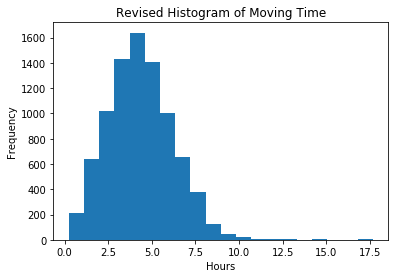

In [13]:
new.moving_time_hours.plot(kind = 'hist', bins = 20)

plt.xlabel("Hours")
plt.title("Revised Histogram of Moving Time")

Text(0.5, 1.0, 'Revised Histogram of Hike Length')

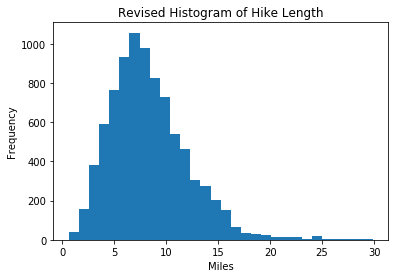

In [14]:
new.length_miles.plot(kind = 'hist', bins = 30)

plt.xlabel("Miles")
plt.title("Revised Histogram of Hike Length")

Text(0.5, 1.0, 'Revised Histogram of Max Elevation')

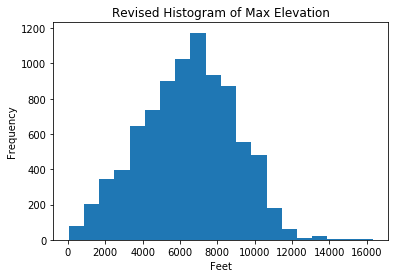

In [15]:
new.max_elevation_feet.plot(kind = 'hist', bins = 20)

plt.xlabel("Feet")
plt.title("Revised Histogram of Max Elevation")

Text(0.5, 1.0, 'Revised Histogram of Elevation Gain')

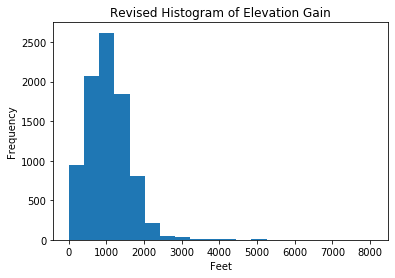

In [16]:
new.uphill.plot(kind = 'hist', bins = 20)

plt.xlabel("Feet")
plt.title("Revised Histogram of Elevation Gain")

Text(0.5, 1.0, 'Revised Histogram of Max Speed')

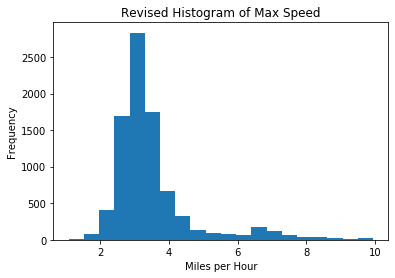

In [17]:
new.max_speed_mph.plot(kind = 'hist', bins = 20)

plt.xlabel("Miles per Hour")
plt.title("Revised Histogram of Max Speed")

Text(0.5, 1.0, 'Revised Histogram of Hike Difficulty')

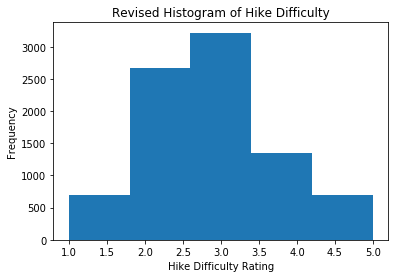

In [18]:
new.difficulty_num.plot(kind = 'hist', bins = 5)

plt.xlabel("Hike Difficulty Rating")
plt.title("Revised Histogram of Hike Difficulty")

o Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2). 

In [19]:
new.mean()

moving_time_hours        4.373277
length_miles             8.345485
max_elevation_feet    6426.270329
uphill                1052.396094
max_speed_mph            3.487706
difficulty_num           2.846332
dtype: float64

In [20]:
new.mode()

,moving_time_hours,length_miles,max_elevation_feet,uphill,max_speed_mph,difficulty_num
0,2.944722,3.114102,6940.682637,522.878000,2.655828,3.0
1,4.476944,4.048032,NaN,583.569000,3.057670,NaN
2,NaN,5.384432,NaN,643.500000,3.062733,NaN
3,NaN,5.527027,NaN,714.835000,3.176989,NaN
4,NaN,7.592438,NaN,1013.029956,3.204284,NaN
5,NaN,7.952077,NaN,1138.100000,3.263542,NaN
6,NaN,9.839240,NaN,1176.368000,3.525510,NaN
7,NaN,12.126659,NaN,1312.776000,4.039699,NaN
8,NaN,NaN,NaN,1344.115967,NaN,NaN
9,NaN,NaN,NaN,1625.863000,NaN,NaN


In [21]:
new.var()

moving_time_hours     3.641388e+00
length_miles          1.401639e+01
max_elevation_feet    6.264849e+06
uphill                3.436293e+05
max_speed_mph         1.439116e+00
difficulty_num        1.088345e+00
dtype: float64

In [22]:
new.std()

moving_time_hours        1.908242
length_miles             3.743847
max_elevation_feet    2502.968120
uphill                 586.199031
max_speed_mph            1.199632
difficulty_num           1.043238
dtype: float64

In [23]:
new.tail(n = 5)

,moving_time_hours,length_miles,max_elevation_feet,uphill,max_speed_mph,difficulty_num
12135,4.387778,6.164873,7295.931992,915.679000,2.951832,2
12136,1.196111,2.412218,5259.631868,672.730664,2.845362,3
12137,4.072222,8.167313,5461.483114,928.770000,3.863931,2
12138,2.288611,5.508487,5440.616972,821.240000,4.711656,1
12139,5.098333,10.592922,2121.456761,307.855000,3.188665,1


o Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).


In [24]:
s_indices = new['length_miles'] < 8
shorter_hikes = new.loc[s_indices, :]

l_indices = new['length_miles'] >= 8
longer_hikes = new.loc[l_indices, :]
                 

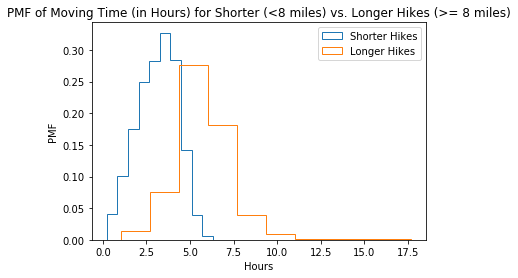

In [25]:
fig, ax = plt.subplots()

ax.hist(shorter_hikes['moving_time_hours'], histtype = "step", label = "Shorter Hikes", density = 1) 
ax.hist(longer_hikes['moving_time_hours'], histtype = "step", label = "Longer Hikes", density = 1)

plt.ylabel("PMF")
plt.xlabel("Hours")
plt.title("PMF of Moving Time (in Hours) for Shorter (<8 miles) vs. Longer Hikes (>= 8 miles)")

ax.legend()
plt.show()

o Create 1 CDF with one of your variables.

C:\Users\Tim\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0.5, 1.0, 'CDF of Moving Time (in Hours)')

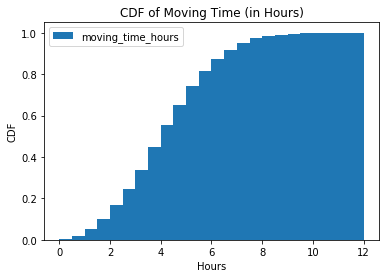

In [26]:
new.plot(y = "moving_time_hours", kind = "hist", bins = 24, range = (0, 12), normed = True, cumulative = True)
plt.ylabel("CDF")
plt.xlabel("Hours")
plt.title("CDF of Moving Time (in Hours)")

Using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

The CDF tells me that there are only a small number of hikes less than 1 hour in length. The CDF tends to increase at a greater rate after 2 hours and then maintains that rate until about 6 hours.  The rate of increase then slows between about 6-8 hours and tends to level off between 8-10 hours. 
Also, since the distribution of moving time in my dataset resembles a normal distribution, I should have more tests available to answer my questions and prove my hypothesis. 

o Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

((array([-3.77400301, -3.54679521, -3.42196011, ...,  3.42196011,
          3.54679521,  3.77400301]),
  array([ 0.23361111,  0.2525    ,  0.27194444, ..., 17.41944444,
         17.68777778, 17.68777778])),
 (1.8829397566263673, 4.373277288471692, 0.9863944659234694))

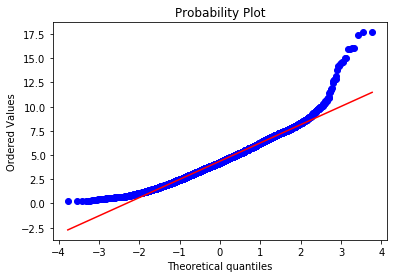

In [27]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(new.moving_time_hours, plot= plt)


The probability plot for the moving time in hours indicates a mostly normal distribution, except in the tails.  Having a normal distributuion is an assumption for most test statistics so important for proving my hypothesis. 

o Create two scatter plots comparing two variables.  

Text(0.5, 1.0, 'Scatterplot of Moving Time and Elevation Gain')

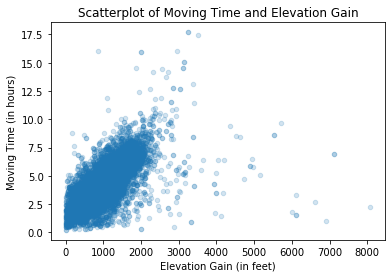

In [28]:
new.plot(x = 'uphill', y = 'moving_time_hours', kind = 'scatter', alpha = 0.2)

plt.ylabel("Moving Time (in hours)")
plt.xlabel("Elevation Gain (in feet)")
plt.title("Scatterplot of Moving Time and Elevation Gain")

Text(0.5, 1.0, 'Scatterplot of Moving Time and Length of Hike')

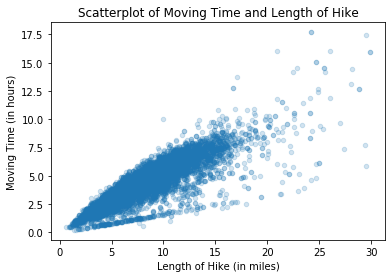

In [29]:
new.plot(x = 'length_miles', y = 'moving_time_hours', kind = 'scatter', alpha = 0.2)

plt.ylabel("Moving Time (in hours)")
plt.xlabel("Length of Hike (in miles)")
plt.title("Scatterplot of Moving Time and Length of Hike")

Provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [30]:
new.cov()

,moving_time_hours,length_miles,max_elevation_feet,uphill,max_speed_mph,difficulty_num
moving_time_hours,3.641388,6.064626,1.577658e+03,696.863306,-0.451533,0.424616
length_miles,6.064626,14.016391,1.382609e+03,1182.677664,0.663094,0.374250
max_elevation_feet,1577.657606,1382.608648,6.264849e+06,743264.268007,-619.559995,1318.666275
uphill,696.863306,1182.677664,7.432643e+05,343629.304279,-28.116542,259.396941
max_speed_mph,-0.451533,0.663094,-6.195600e+02,-28.116542,1.439116,-0.108883
difficulty_num,0.424616,0.374250,1.318666e+03,259.396941,-0.108883,1.088345


In [31]:
new.corr()

,moving_time_hours,length_miles,max_elevation_feet,uphill,max_speed_mph,difficulty_num
moving_time_hours,1.000000,0.848892,0.330312,0.622973,-0.197246,0.213294
length_miles,0.848892,1.000000,0.147545,0.538894,0.147642,0.095821
max_elevation_feet,0.330312,0.147545,1.000000,0.506574,-0.206338,0.505006
uphill,0.622973,0.538894,0.506574,1.000000,-0.039982,0.424167
max_speed_mph,-0.197246,0.147642,-0.206338,-0.039982,1.000000,-0.087002
difficulty_num,0.213294,0.095821,0.505006,0.424167,-0.087002,1.000000


The strongest correlations are the length of the hike (.85), elevation gain (uphill = .62), the max elevation (.33), and the hike difficulty (.21).  These correlations seem reasonable.  There appears to be a negative correlation between maximum speed and the time spent hiking.  However, it does appear plausible that the maximum speed could have no impact on the time spent hiking, as one could potentially run for a few seconds to increase the maximum speed and then spend the rest of the hike hiking at a slower pace.  

The relationships between variables seem to be approximately linear.

o Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

Under classical hypothesis testing, the steps are as follows:

    1) Quantify the size of the effect by choosing a test statistic
    The test statistic I chose is testing a correlation (see below).  Since we have a roughly normal distribution can
    use Pearson's correlation.  
    
    2) Define the null hypothesis
    The null hypothesis is that the length of the hike has no impact on the time spent hiking.
    
    3) Compute p-value
    The p-value is less than .01 so statistically significant.  We can reject the null hypothesis,
    
    4) Interpret the result
    There is a positive correlation of approximately 0.85 between the hiking time and the length of the hike.
    

In [32]:
from scipy.stats.stats import pearsonr

pearsonr(new.moving_time_hours, new.length_miles)

(0.8488919658393969, 0.0)

o For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

# Fit a linear model using multiple independent variables
model_lm = ols(formula = 'moving_time_hours ~ length_miles + uphill',
               data = new).fit()

print(model_lm.summary())  # Print regression results summary

                            OLS Regression Results                            
Dep. Variable:      moving_time_hours   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.360e+04
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:56:56   Log-Likelihood:                -11676.
No. Observations:                8629   AIC:                         2.336e+04
Df Residuals:                    8626   BIC:                         2.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4979      0.026     19.423   

I ran various combinations of regression models using length_miles, uphill (elevation gain), max_elevation_feet, and difficulty_num (max_speed_mph has a negative correlation) as predictor variables.  The highest r-squared value of .780 was a combination of length_miles, uphill, and max_elevation_feet.  However, the p-value for the y-intercept was less than .05, so not significantly significant.  I then tried a combination of only length_miles and uphill as predictor variables, resulting in an r-squared of .759 and all p-values less than .01.  The elevation gain (uphill) doesn't contribute much to the regression model, but does provide a higher p-value than with the length of the hike as the only predictor variable.  Thus, it appears that the length of the hike and elevation gain are the best predictors of the time spent hiking.